In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.utils import resample

dataFile = "../data/proportionalDataStripped.csv"
stats = ["s_str", "s_dex", "s_con", "s_int", "s_wis", "s_cha"]
stats_names = ["Strength", "Dexterity", "Constitution", "Intelligence", "Wisdom", "Charmisma"]
classes = ["Barbarian", "Bard", "Cleric", "Druid", "Fighter", "Monk", "Paladin", "Ranger", "Rogue", "Sorcerer", "Warlock", "Wizard"]

data = pd.read_csv(dataFile)
data = data[data["class_starting"].isin(classes)]

X = data[stats]
y = data["class_starting"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2137, test_size=0.2)

# for layout in [[5], [10], [20], [5, 5], [5, 10], [10, 10], [20, 20], [5, 5, 5], [5, 10, 5]]:
#     model = OneVsRestClassifier(MLPClassifier(layout, activation="relu", random_state=2137), n_jobs=14).fit(X_train, y_train)
#     print(f'Training Accuracy: {accuracy_score(y_train, model.predict(X_train))}, Testing Accuracy: {accuracy_score(y_test, model.predict(X_test))}')

model = OneVsRestClassifier(MLPClassifier([50, 50], activation="relu", random_state=2137), n_jobs=12, verbose=100).fit(X_train, y_train)
print(f'Training Accuracy: {accuracy_score(y_train, model.predict(X_train))}, Testing Accuracy: {accuracy_score(y_test, model.predict(X_test))}')


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:   20.5s
[Parallel(n_jobs=12)]: Done   2 out of  12 | elapsed:   25.2s remaining:  2.1min
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:   32.1s remaining:  1.6min
[Parallel(n_jobs=12)]: Done   4 out of  12 | elapsed:   34.4s remaining:  1.1min
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:   35.7s remaining:   50.0s
[Parallel(n_jobs=12)]: Done   6 out of  12 | elapsed:   37.9s remaining:   37.9s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:   40.2s remaining:   28.7s
[Parallel(n_jobs=12)]: Done   8 out of  12 | elapsed:   41.1s remaining:   20.5s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:   41.1s remaining:   13.7s
[Parallel(n_jobs=12)]: Done  10 out of  12 | elapsed:   42.4s remaining:    8.5s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:   46.1s finished
Training Accuracy: 0.5284539355671952, Testing Accuracy: 0.52

[[ 3741    42   584    17  9516    97  2051   230    79    54     6    86]
 [   32  8509   480    78   132    58  1112    18  1003  3239   231   532]
 [   29   320 15724  2427   471   460   882   272   173   123   145   894]
 [   26   155  4777  6441   345   807   182   478   289   114   100  1189]
 [ 2309   504  1240   106 14045   564  4654   942  1626   177    16   837]
 [   98   303   873  1259  1217  4945   250  3377  1754    46     8   237]
 [  430   523  1168    65  1942    84 16595    73   287   309    45   212]
 [   88   548  1096  1109  2642  3596   375  5277  2897   102     6   583]
 [   59  3987   449   558  2244  1355   406  1569 11284   681    28  2199]
 [   16  3705   654   134   213    29   972    34   414  6786   436  1132]
 [   14  3938   682   171   145    26  1280    35   382  5718   637   907]
 [    6   266   627   447   523    27   173    89   552   250    41 16523]]
[[ 963   14  149    4 2364   16  477   51   17   14    1   15]
 [   7 2181  133   16   42   16  287

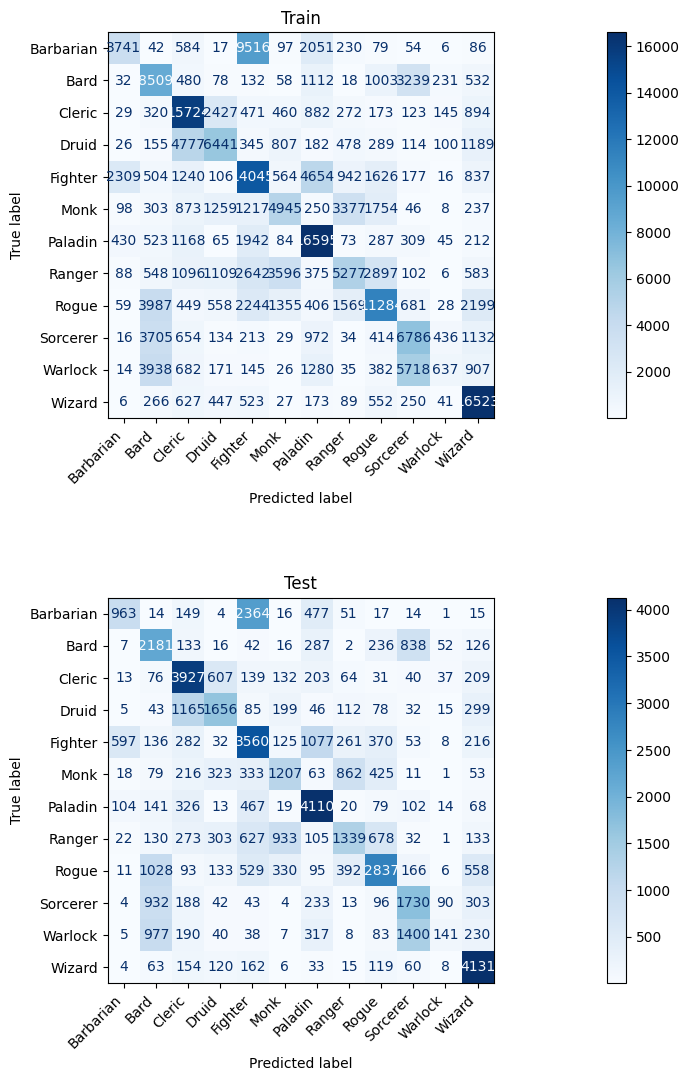

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

train_conf_matrix = confusion_matrix(y_train, model.predict(X_train), labels=model.classes_)
test_conf_matrix = confusion_matrix(y_test, model.predict(X_test), labels=model.classes_)
print(train_conf_matrix)
print(test_conf_matrix)

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(24, 12))

axes[0].set_title("Train")
ConfusionMatrixDisplay(confusion_matrix=train_conf_matrix, display_labels=model.classes_).plot(cmap='Blues', ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')

axes[1].set_title("Test")
ConfusionMatrixDisplay(confusion_matrix=test_conf_matrix, display_labels=model.classes_).plot(cmap='Blues', ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')

fig.tight_layout(pad=5.0)
plt.show()